## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
plt.style.use('seaborn-poster')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

## Load source datasets

In [3]:
train = pd.read_csv("../input/mh-renew-data/train.csv")
print(f"train: {train.shape}")
train.head()

train: (909604, 16)


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [4]:
test = pd.read_csv("../input/mh-renew-data/test.csv")
print(f"test: {test.shape}")
test.head()

test: (303202, 15)


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158


## Preliminary Checks

In [5]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [6]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303202 entries, 0 to 303201
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               303202 non-null  object 
 1   active_power_calculated_by_converter    303202 non-null  float64
 2   active_power_raw                        303202 non-null  float64
 3   ambient_temperature                     303202 non-null  float64
 4   generator_speed                         303202 non-null  float64
 5   generator_winding_temp_max              303202 non-null  float64
 6   grid_power10min_average                 303202 non-null  float64
 7   nc1_inside_temp                         303202 non-null  float64
 8   nacelle_temp                            303202 non-null  float64
 9   reactice_power_calculated_by_converter  303202 non-null  float64
 10  reactive_power                          3032

In [7]:
pd.merge(
    train,
    test,
    how='inner',
    on=test.columns.tolist(),
    sort=False
).head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target


## Target Data Distribution

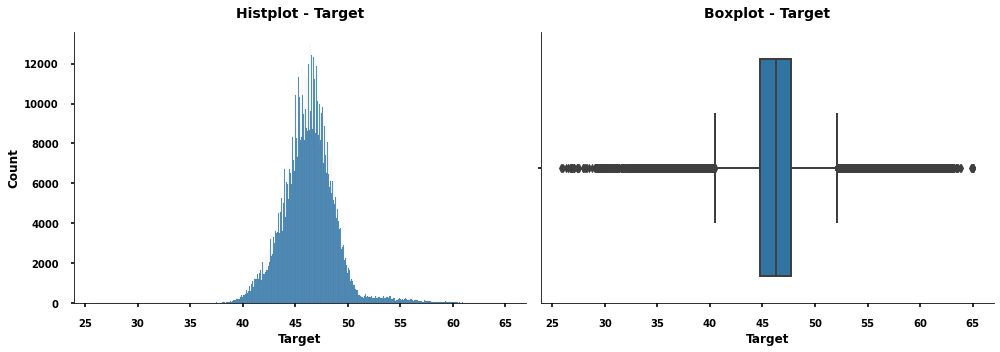

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='Target', data=train, ax=ax[0])
sns.boxplot(x='Target', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - Target", pad=15)
ax[1].set_title(f"Boxplot - Target", pad=15)
fig.tight_layout();

## Feature-wise EDA

### timestamp

**Timestamp at which the observation was recorded**

In [9]:
train['ts_month'] = train['timestamp'].progress_apply(lambda x: pd.to_datetime(x).month)
train['ts_day'] = train['timestamp'].progress_apply(lambda x: pd.to_datetime(x).day)
train['ts_hour'] = train['timestamp'].progress_apply(lambda x: pd.to_datetime(x).hour)
train['ts_minute'] = train['timestamp'].progress_apply(lambda x: pd.to_datetime(x).minute)
train.head()

100%|██████████| 909604/909604 [01:29<00:00, 10139.76it/s]


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,ts_month,ts_day,ts_hour,ts_minute
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787,2,19,20,18
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328,4,27,4,55
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236,1,25,6,26
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587,10,30,3,47
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095,3,15,0,39


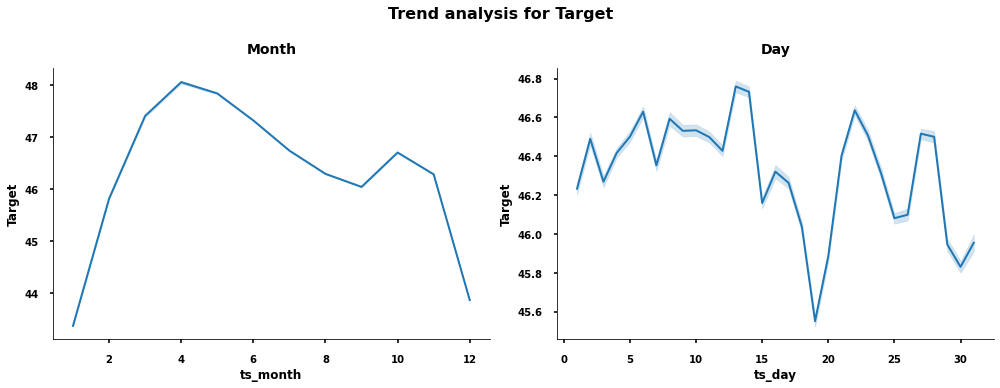

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.lineplot(x='ts_month', y='Target', data=train, ax=ax[0])
sns.lineplot(x='ts_day', y='Target', data=train, ax=ax[1])
ax[0].set_title('Month', pad=15)
ax[1].set_title('Day', pad=15)
fig.tight_layout()
plt.suptitle("Trend analysis for Target",
             y=1.07, fontweight='bold');

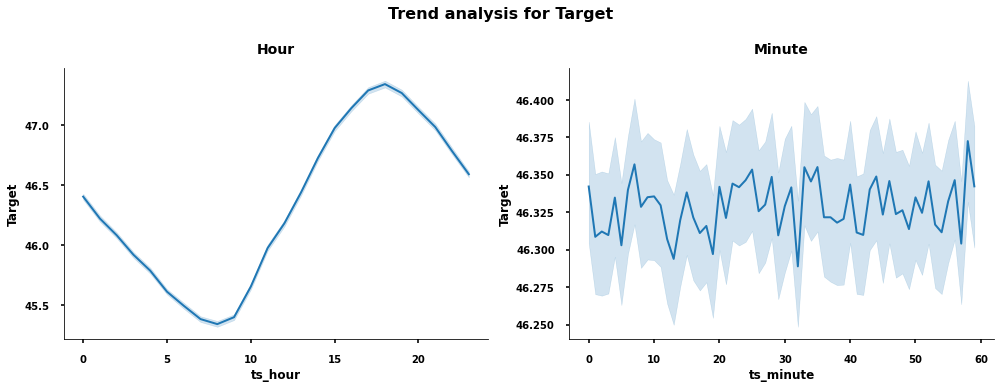

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.lineplot(x='ts_hour', y='Target', data=train, ax=ax[0])
sns.lineplot(x='ts_minute', y='Target', data=train, ax=ax[1])
ax[0].set_title('Hour', pad=15)
ax[1].set_title('Minute', pad=15)
fig.tight_layout()
plt.suptitle("Trend analysis for Target",
             y=1.07, fontweight='bold');

### active_power_calculated_by_converter

**Active Power Calculated by the converter**

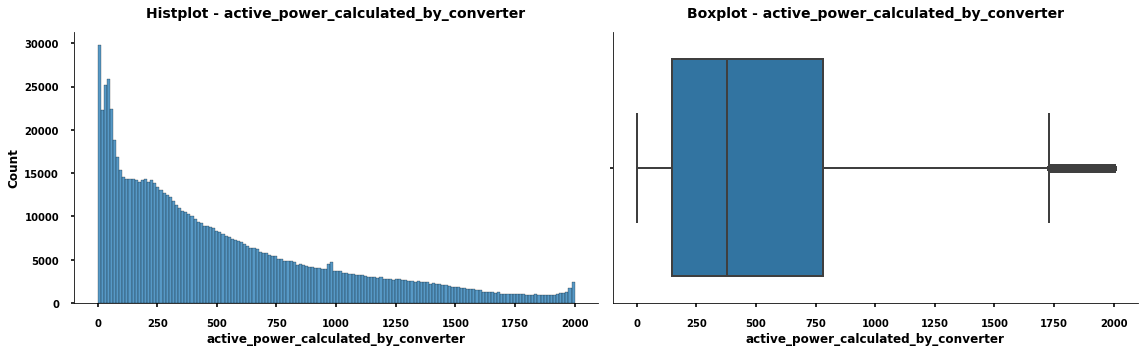

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x='active_power_calculated_by_converter', data=train, ax=ax[0])
sns.boxplot(x='active_power_calculated_by_converter', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - active_power_calculated_by_converter", pad=15)
ax[1].set_title(f"Boxplot - active_power_calculated_by_converter", pad=15)
fig.tight_layout();

### active_power_raw

**Raw Active Power**

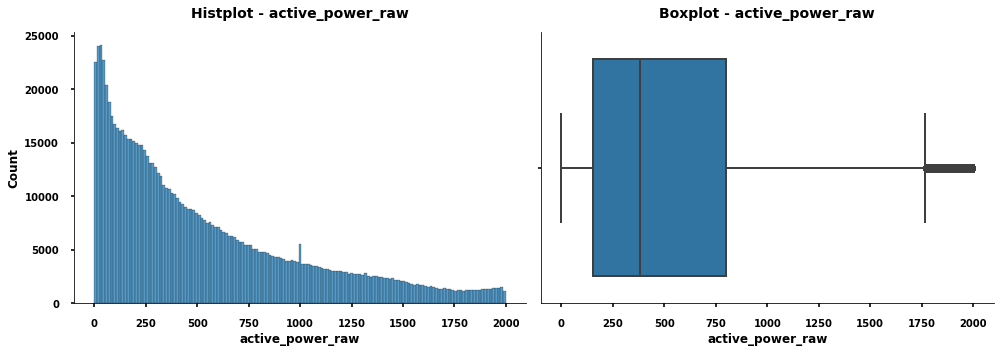

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='active_power_raw', data=train, ax=ax[0])
sns.boxplot(x='active_power_raw', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - active_power_raw", pad=15)
ax[1].set_title(f"Boxplot - active_power_raw", pad=15)
fig.tight_layout();

### ambient_temperature

**Environment Temperature reading from temperature sensor**

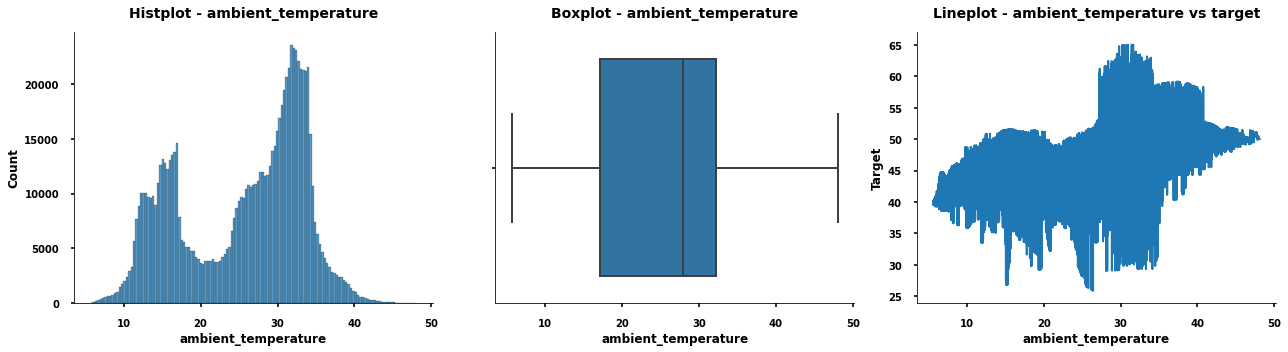

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(x='ambient_temperature', data=train, ax=ax[0])
sns.boxplot(x='ambient_temperature', data=train, ax=ax[1])
sns.lineplot(x='ambient_temperature', y='Target', data=train, ax=ax[2])
ax[0].set_title(f"Histplot - ambient_temperature", pad=15)
ax[1].set_title(f"Boxplot - ambient_temperature", pad=15)
ax[2].set_title(f"Lineplot - ambient_temperature vs target", pad=15)
fig.tight_layout();

### generator_speed

**Number of rotations by generator wheel per min**

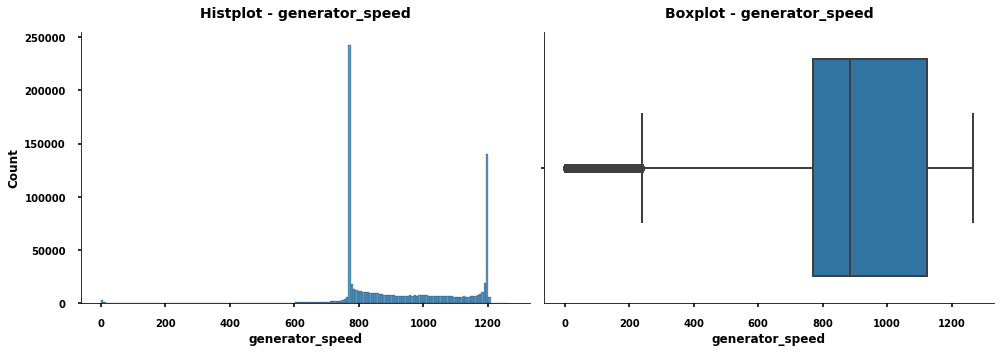

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='generator_speed', data=train, ax=ax[0])
sns.boxplot(x='generator_speed', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - generator_speed", pad=15)
ax[1].set_title(f"Boxplot - generator_speed", pad=15)
fig.tight_layout();

### generator_winding_temp_max

**Temperature of wire windings of generator**

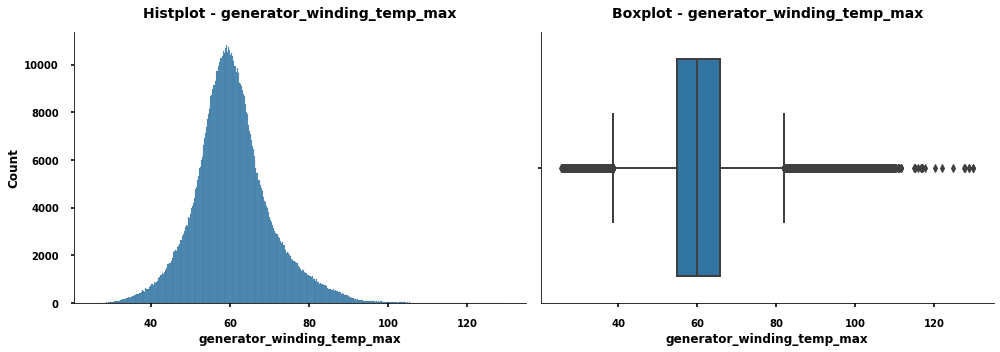

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='generator_winding_temp_max', data=train, ax=ax[0])
sns.boxplot(x='generator_winding_temp_max', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - generator_winding_temp_max", pad=15)
ax[1].set_title(f"Boxplot - generator_winding_temp_max", pad=15)
fig.tight_layout();

### grid_power10min_average

**Average(10 Min) Power generated**

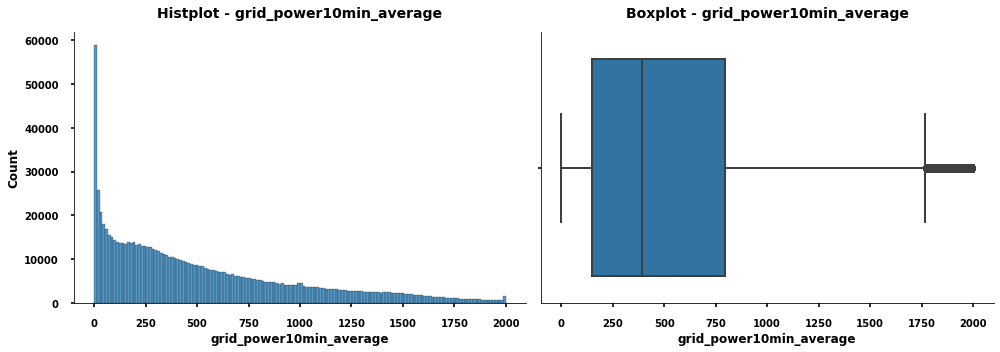

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='grid_power10min_average', data=train, ax=ax[0])
sns.boxplot(x='grid_power10min_average', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - grid_power10min_average", pad=15)
ax[1].set_title(f"Boxplot - grid_power10min_average", pad=15)
fig.tight_layout();

### nc1_inside_temp

**Temperature inside Nacelle**

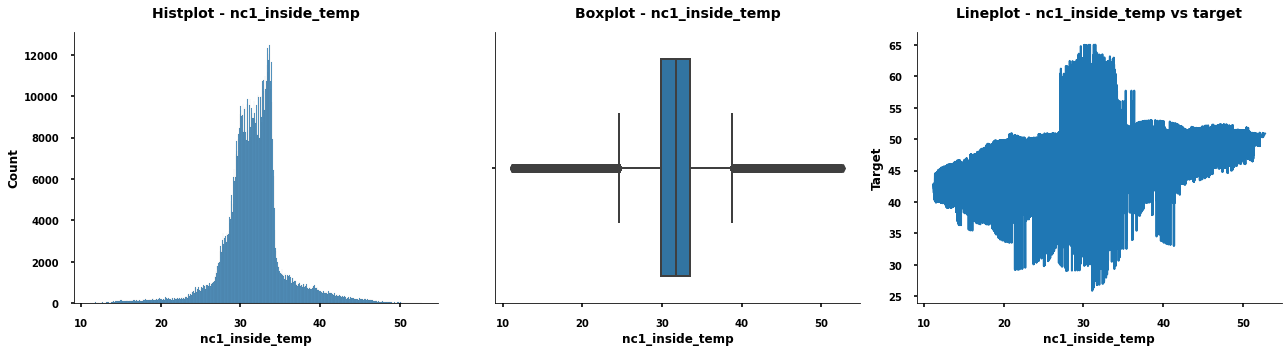

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(x='nc1_inside_temp', data=train, ax=ax[0])
sns.boxplot(x='nc1_inside_temp', data=train, ax=ax[1])
sns.lineplot(x='nc1_inside_temp', y='Target', data=train, ax=ax[2])
ax[0].set_title(f"Histplot - nc1_inside_temp", pad=15)
ax[1].set_title(f"Boxplot - nc1_inside_temp", pad=15)
ax[2].set_title(f"Lineplot - nc1_inside_temp vs target", pad=15)
fig.tight_layout();

### nacelle_temp

**Temperature outside Nacelle**

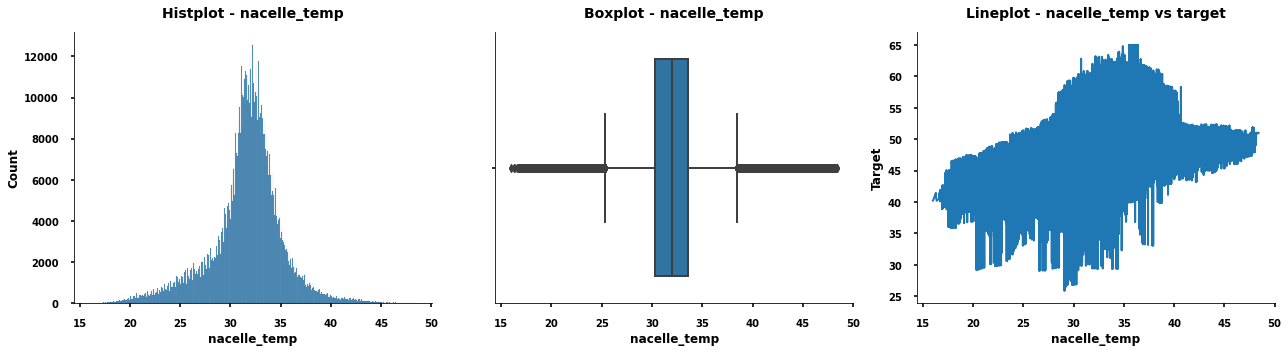

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(x='nacelle_temp', data=train, ax=ax[0])
sns.boxplot(x='nacelle_temp', data=train, ax=ax[1])
sns.lineplot(x='nacelle_temp', y='Target', data=train, ax=ax[2])
ax[0].set_title(f"Histplot - nacelle_temp", pad=15)
ax[1].set_title(f"Boxplot - nacelle_temp", pad=15)
ax[2].set_title(f"Lineplot - nacelle_temp vs target", pad=15)
fig.tight_layout();

### reactice_power_calculated_by_converter

**Secondary Power generated by wind turbines at output source**

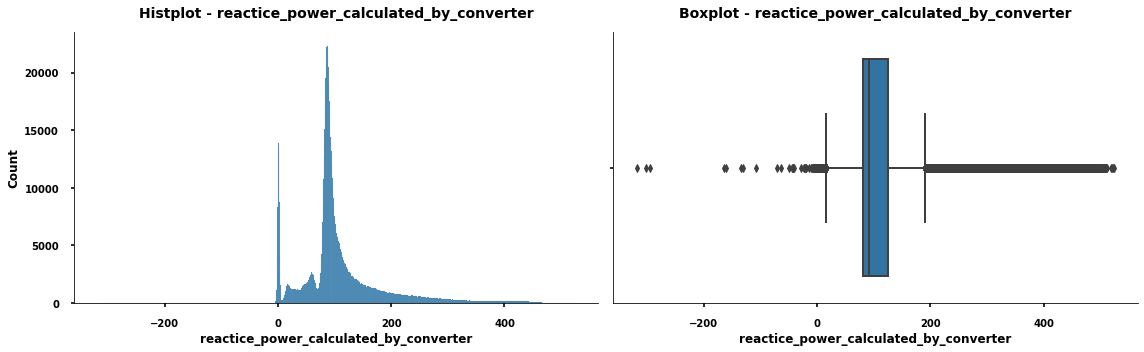

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x='reactice_power_calculated_by_converter', data=train, ax=ax[0])
sns.boxplot(x='reactice_power_calculated_by_converter', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - reactice_power_calculated_by_converter", pad=15)
ax[1].set_title(f"Boxplot - reactice_power_calculated_by_converter", pad=15)
fig.tight_layout();

### reactive_power

**Secondary Power generated by wind turbines at input source**

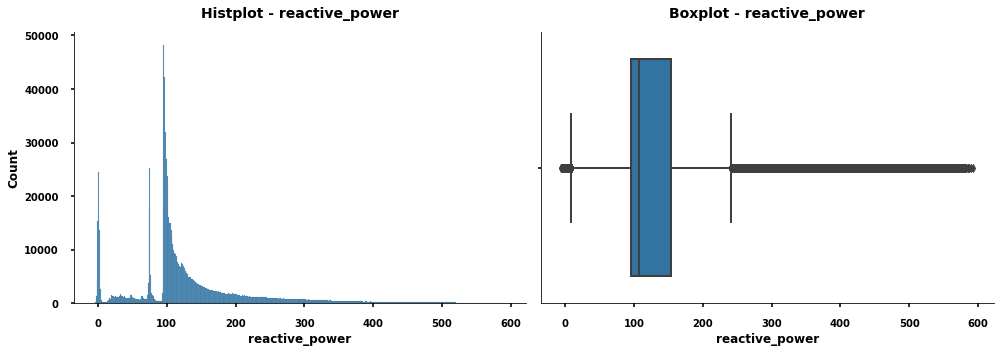

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='reactive_power', data=train, ax=ax[0])
sns.boxplot(x='reactive_power', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - reactive_power", pad=15)
ax[1].set_title(f"Boxplot - reactive_power", pad=15)
fig.tight_layout();

### wind_direction_raw

**Wind Direction**

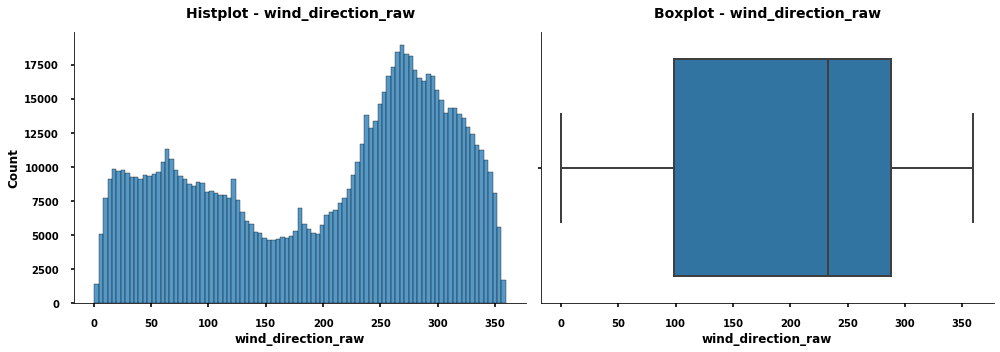

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='wind_direction_raw', data=train, ax=ax[0])
sns.boxplot(x='wind_direction_raw', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - wind_direction_raw", pad=15)
ax[1].set_title(f"Boxplot - wind_direction_raw", pad=15)
fig.tight_layout();

### wind_speed_raw

**Average wind speed**

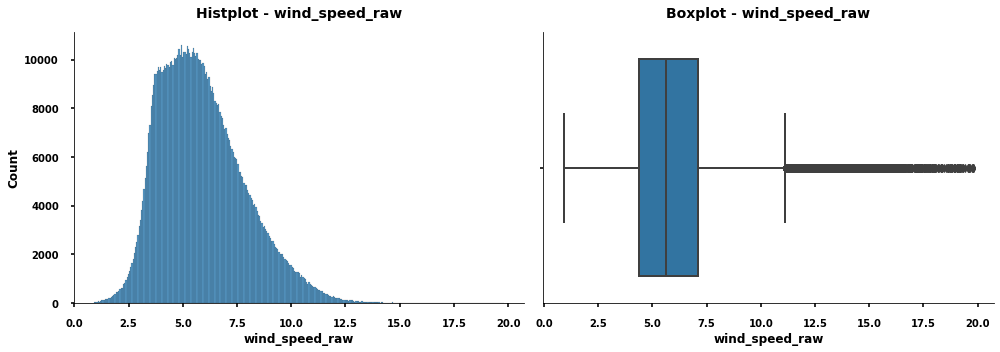

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='wind_speed_raw', data=train, ax=ax[0])
sns.boxplot(x='wind_speed_raw', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - wind_speed_raw", pad=15)
ax[1].set_title(f"Boxplot - wind_speed_raw", pad=15)
fig.tight_layout();

### wind_speed_turbulence

**Variation in Wind Speed**

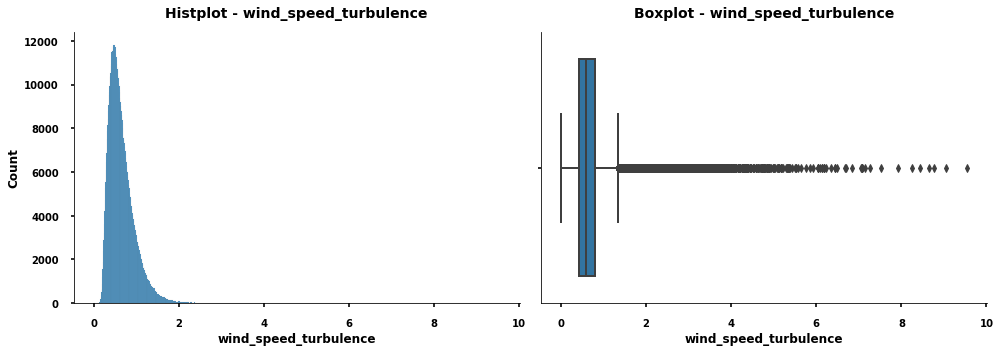

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(x='wind_speed_turbulence', data=train, ax=ax[0])
sns.boxplot(x='wind_speed_turbulence', data=train, ax=ax[1])
ax[0].set_title(f"Histplot - wind_speed_turbulence", pad=15)
ax[1].set_title(f"Boxplot - wind_speed_turbulence", pad=15)
fig.tight_layout();

### turbine_id

**Id of various turbines**

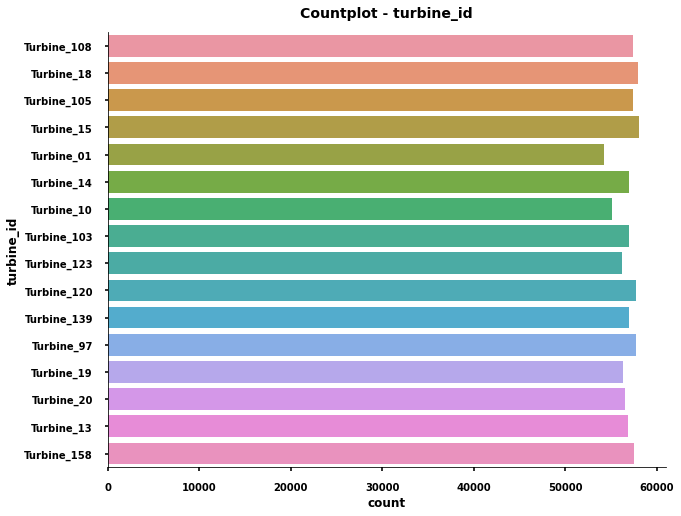

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(y='turbine_id', data=train)
plt.title("Countplot - turbine_id", pad=15);

In [26]:
train['turbine_id'] = train['turbine_id'].progress_apply(lambda x: int(x.split('_')[1]))

100%|██████████| 909604/909604 [00:01<00:00, 584417.76it/s]


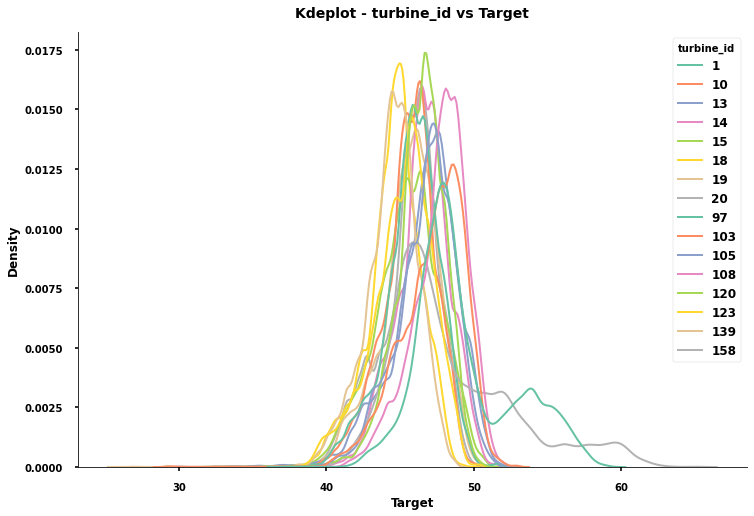

In [27]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Target', hue='turbine_id', data=train, palette='Set2')
plt.title("Kdeplot - turbine_id vs Target", pad=15);

## Feature Interactions

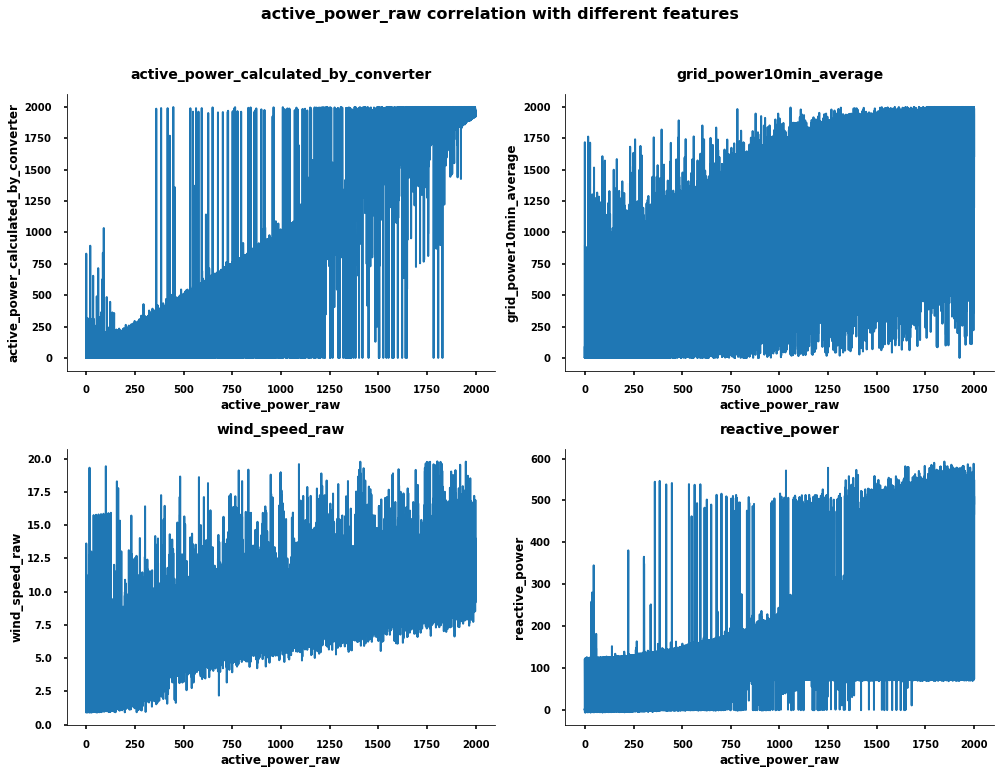

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.lineplot(x='active_power_raw', y='active_power_calculated_by_converter', data=train, ax=ax[0][0])
sns.lineplot(x='active_power_raw', y='grid_power10min_average', data=train, ax=ax[0][1])
sns.lineplot(x='active_power_raw', y='wind_speed_raw', data=train, ax=ax[1][0])
sns.lineplot(x='active_power_raw', y='reactive_power', data=train, ax=ax[1][1])
ax[0][0].set_title(f"active_power_calculated_by_converter", pad=15)
ax[0][1].set_title(f"grid_power10min_average", pad=15)
ax[1][0].set_title(f"wind_speed_raw", pad=15)
ax[1][1].set_title(f"reactive_power", pad=15)
fig.tight_layout()
plt.suptitle("active_power_raw correlation with different features",
             y=1.07, fontweight='bold');

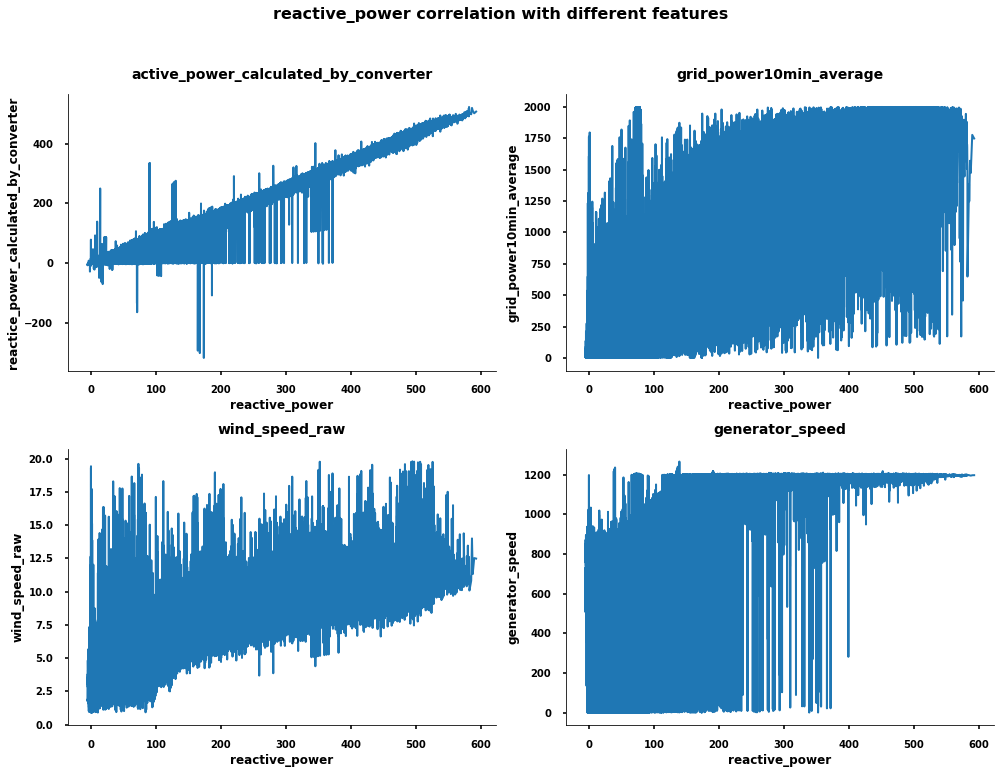

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.lineplot(x='reactive_power', y='reactice_power_calculated_by_converter', data=train, ax=ax[0][0])
sns.lineplot(x='reactive_power', y='grid_power10min_average', data=train, ax=ax[0][1])
sns.lineplot(x='reactive_power', y='wind_speed_raw', data=train, ax=ax[1][0])
sns.lineplot(x='reactive_power', y='generator_speed', data=train, ax=ax[1][1])
ax[0][0].set_title(f"active_power_calculated_by_converter", pad=15)
ax[0][1].set_title(f"grid_power10min_average", pad=15)
ax[1][0].set_title(f"wind_speed_raw", pad=15)
ax[1][1].set_title(f"generator_speed", pad=15)
fig.tight_layout()
plt.suptitle("reactive_power correlation with different features",
             y=1.07, fontweight='bold');

## Features Correlation

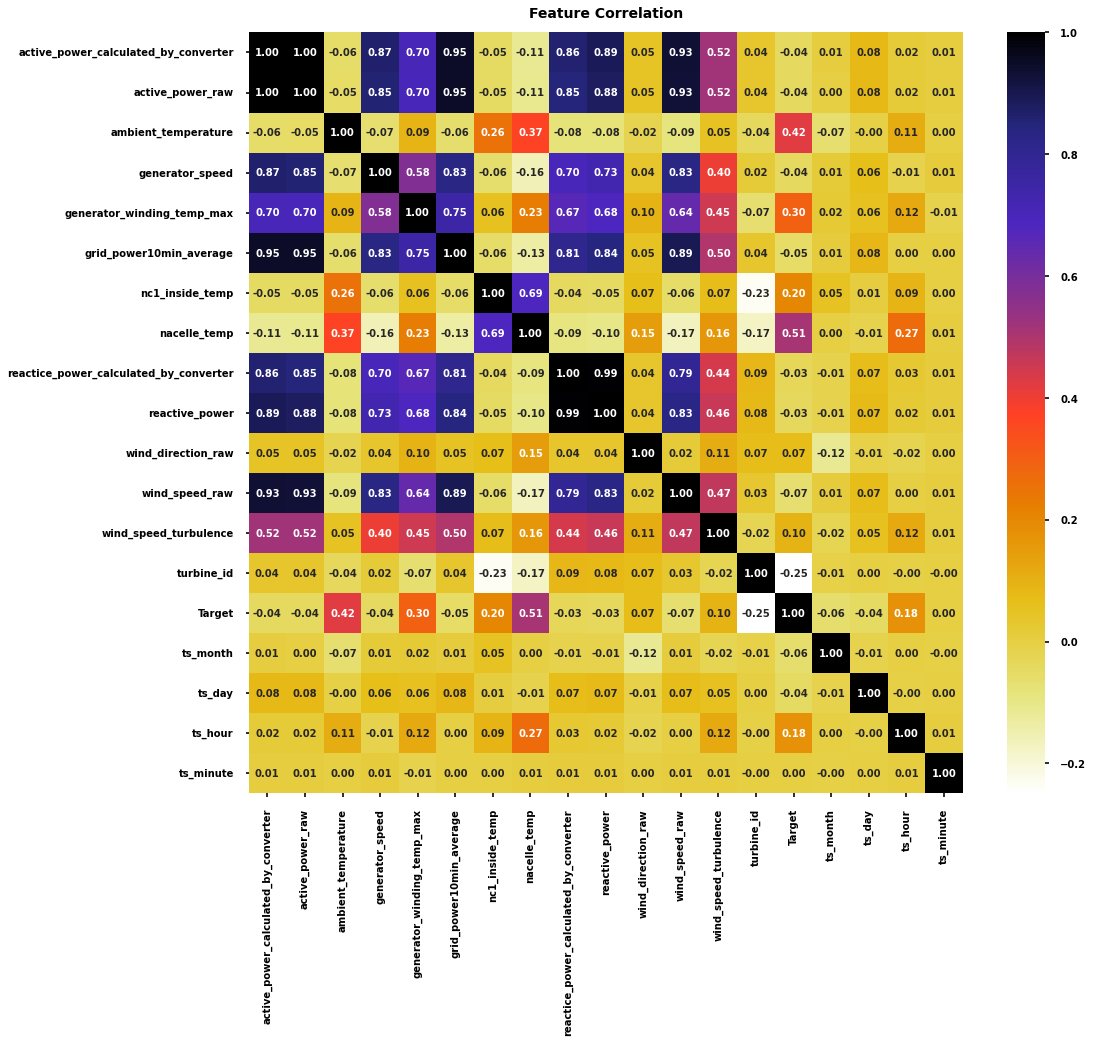

In [30]:
plt.figure(figsize=(16, 14))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap="CMRmap_r")
plt.title("Feature Correlation", pad=15);

In [31]:
## Good Day!!